In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Datasets\ML datasets\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
df = df.drop_duplicates()

In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
cat_var = df.select_dtypes(exclude = ['int', float])
cat_var.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
num_var = df.select_dtypes(exclude = 'object')
num_var.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [16]:
cat_var.nunique()

sex       2
smoker    2
region    4
dtype: int64

In [17]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [18]:
df.groupby('sex')['age'].mean()

sex
female    39.503021
male      38.946667
Name: age, dtype: float64

In [19]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

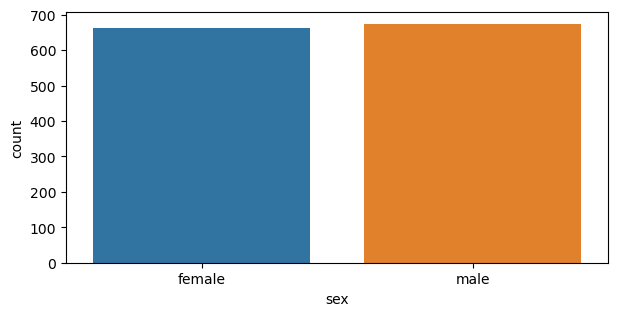

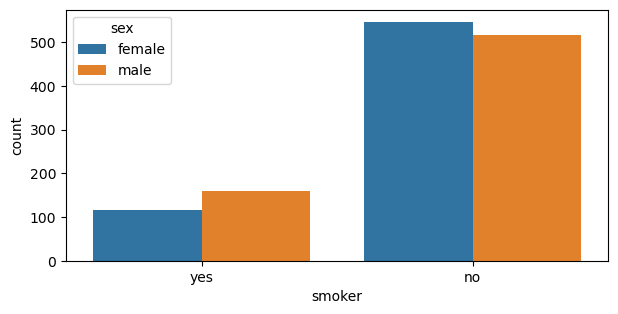

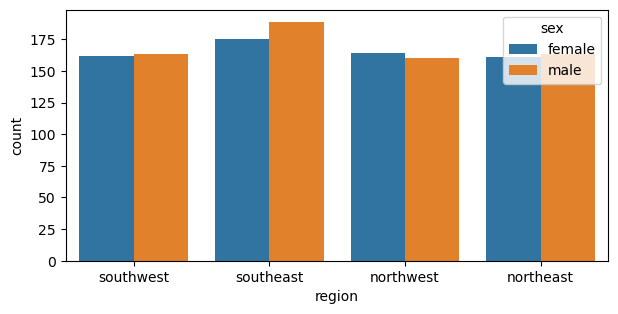

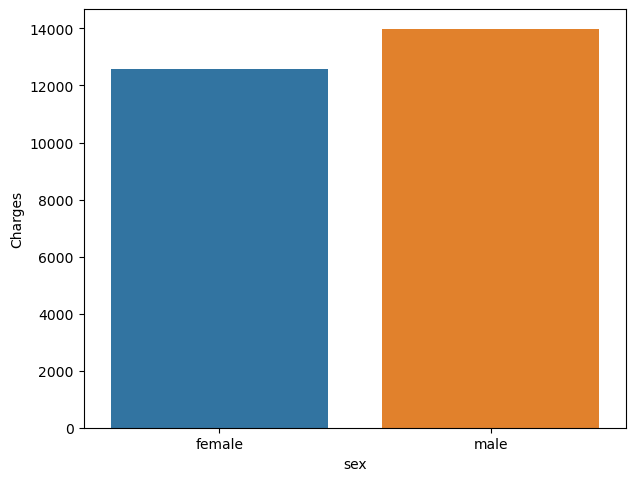

In [20]:
plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 1)
sns.countplot(x = df['sex'])

plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 2)
sns.countplot(x = df['smoker'], hue = df['sex'])

plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 3)
sns.countplot(x = df['region'], hue = df['sex'])

plt.figure(figsize = (7, 25))
plt.subplot(4, 1, 4)
sns.barplot(x = df.groupby('sex')['charges'].mean().index, y = df.groupby('sex')['charges'].mean().values)
plt.ylabel('Charges')

In [21]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [22]:
df.groupby('smoker')['age'].mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

In [23]:
df.groupby('smoker')['charges'].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

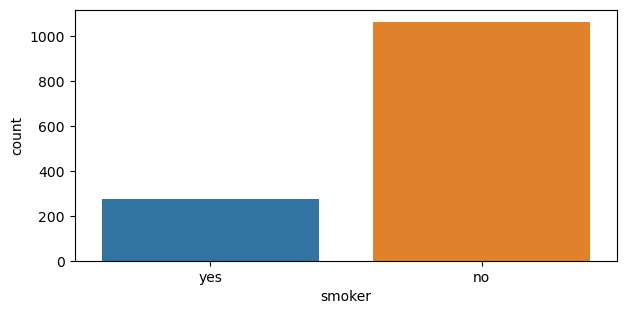

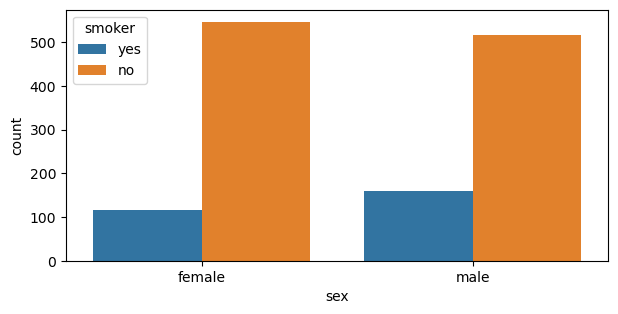

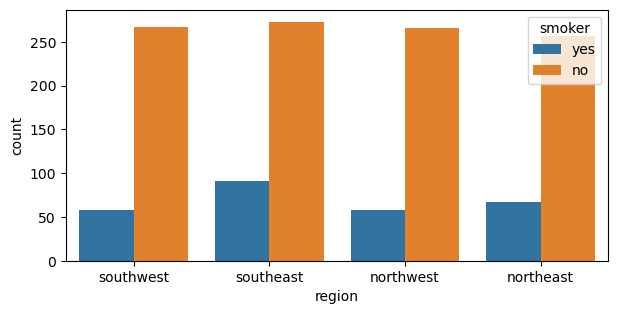

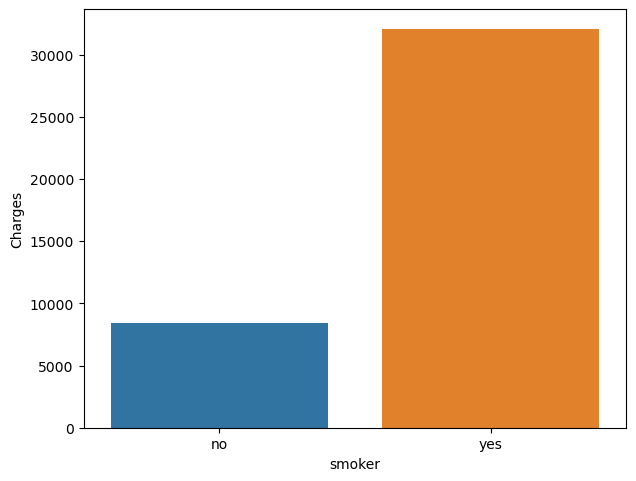

In [24]:
plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 1)
sns.countplot(x = df['smoker'])

plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 2)
sns.countplot(x = df['sex'], hue = df['smoker'])

plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 3)
sns.countplot(x = df['region'], hue = df['smoker'])

plt.figure(figsize = (7, 25))
plt.subplot(4, 1, 4)
sns.barplot(x = df.groupby('smoker')['charges'].mean().index, y = df.groupby('smoker')['charges'].mean().values)
plt.ylabel('Charges')

In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [26]:
df.groupby('region')['age'].mean()

region
northeast    39.268519
northwest    39.259259
southeast    38.939560
southwest    39.455385
Name: age, dtype: float64

In [27]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

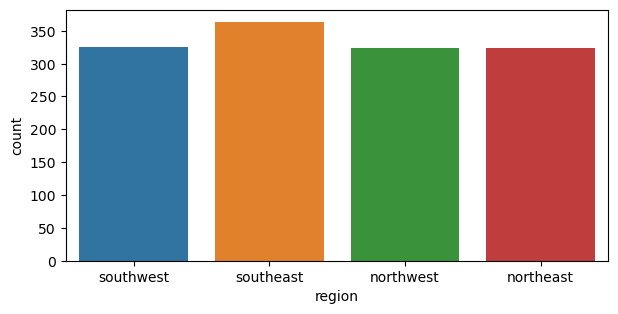

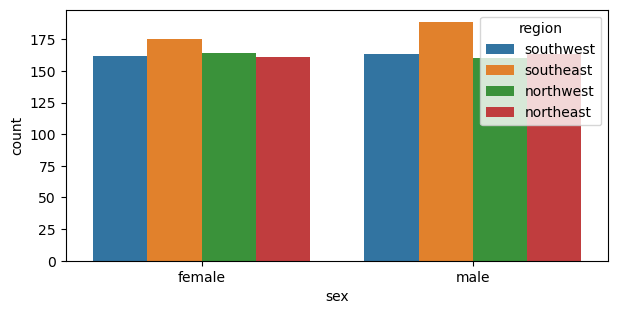

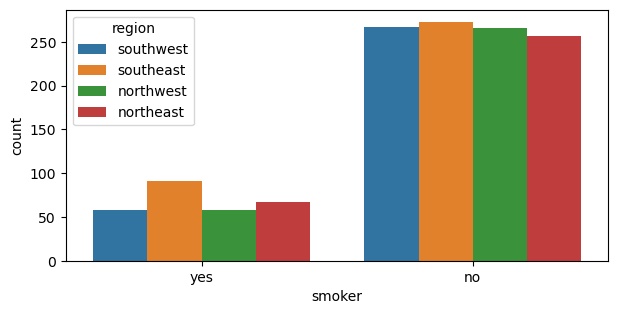

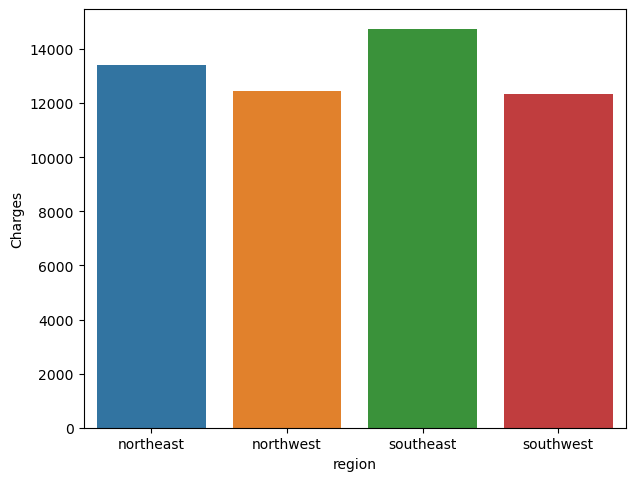

In [28]:
plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 1)
sns.countplot(x = df['region'])

plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 2)
sns.countplot(x = df['sex'], hue = df['region'])

plt.figure(figsize = (7, 15))
plt.subplot(4, 1, 3)
sns.countplot(x = df['smoker'], hue = df['region'])

plt.figure(figsize = (7, 25))
plt.subplot(4, 1, 4)
sns.barplot(x = df.groupby('region')['charges'].mean().index, y = df.groupby('region')['charges'].mean().values)
plt.ylabel('Charges')

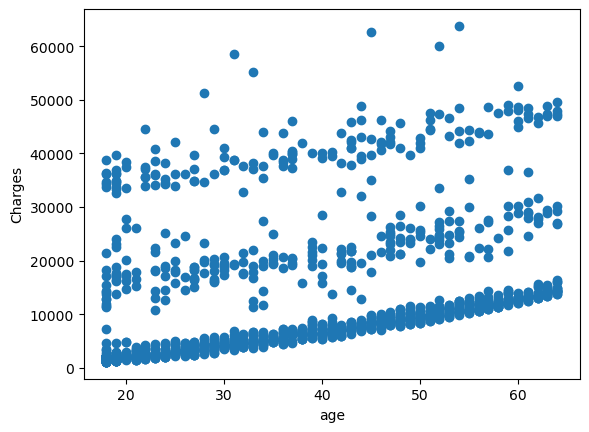

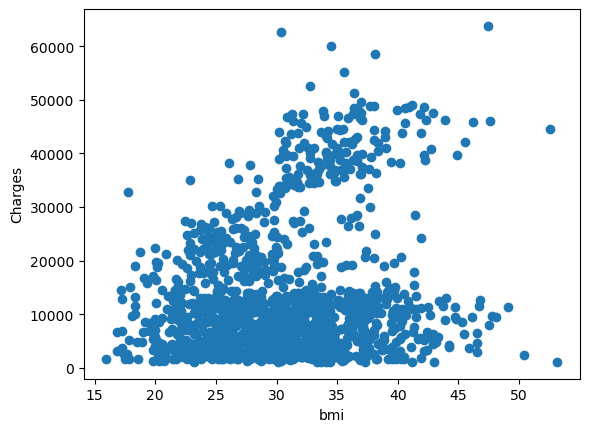

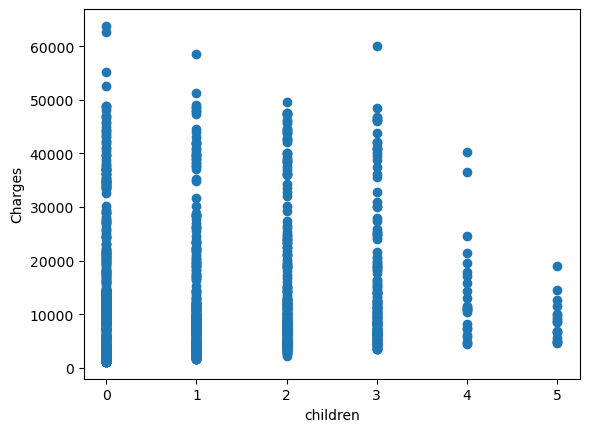

In [29]:
for val in num_var:
    if val != 'charges':
        plt.scatter(x = df[val], y = df['charges'])
        plt.xlabel(val)
        plt.ylabel('Charges')
        plt.show()

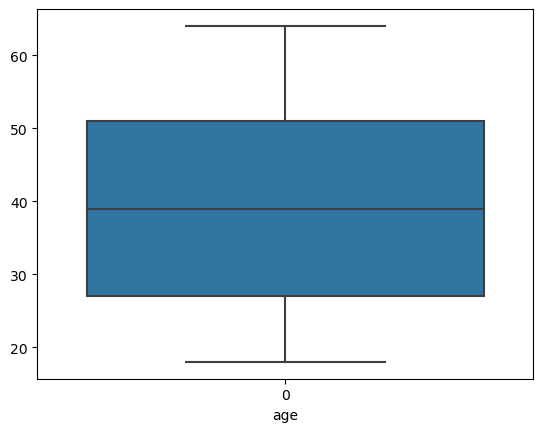

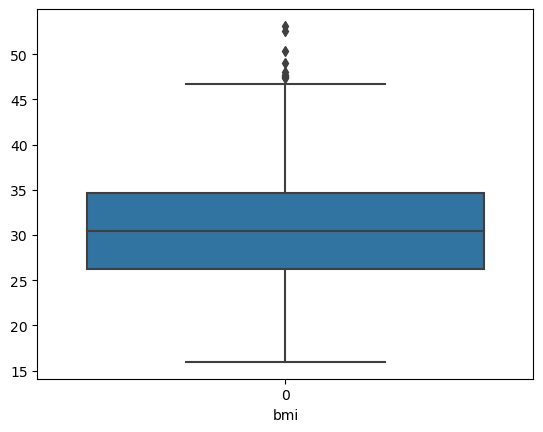

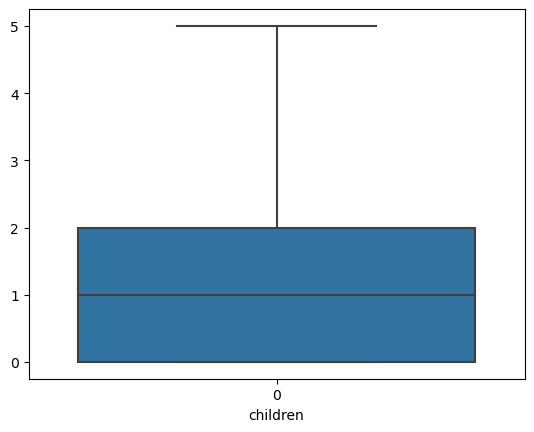

In [30]:
for val in num_var:
    if val != 'charges':
        sns.boxplot(df[val])
        plt.xlabel(val)
        plt.show()

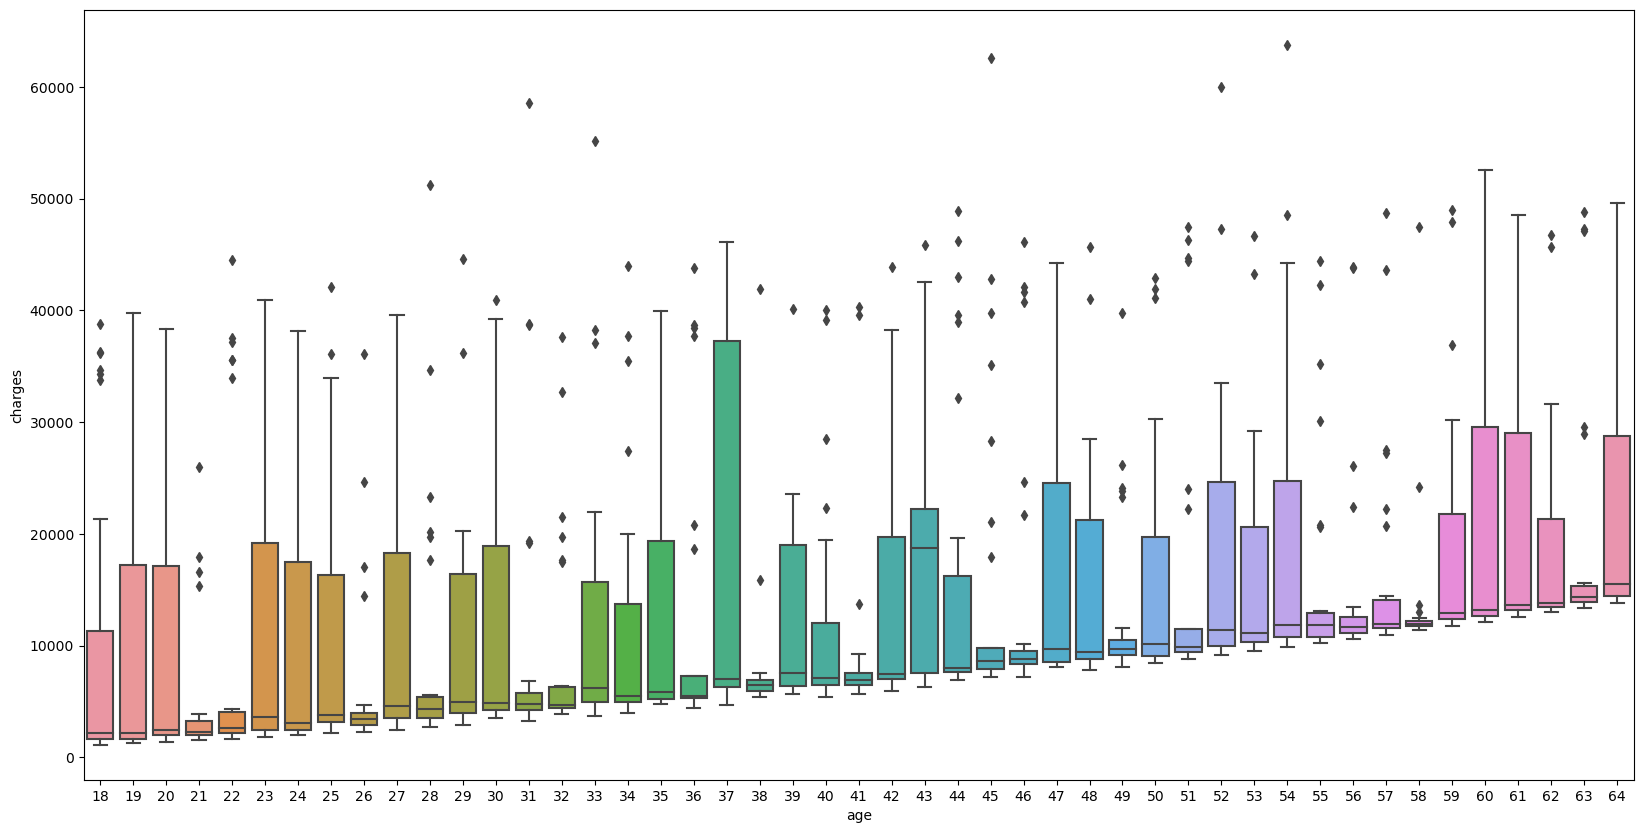

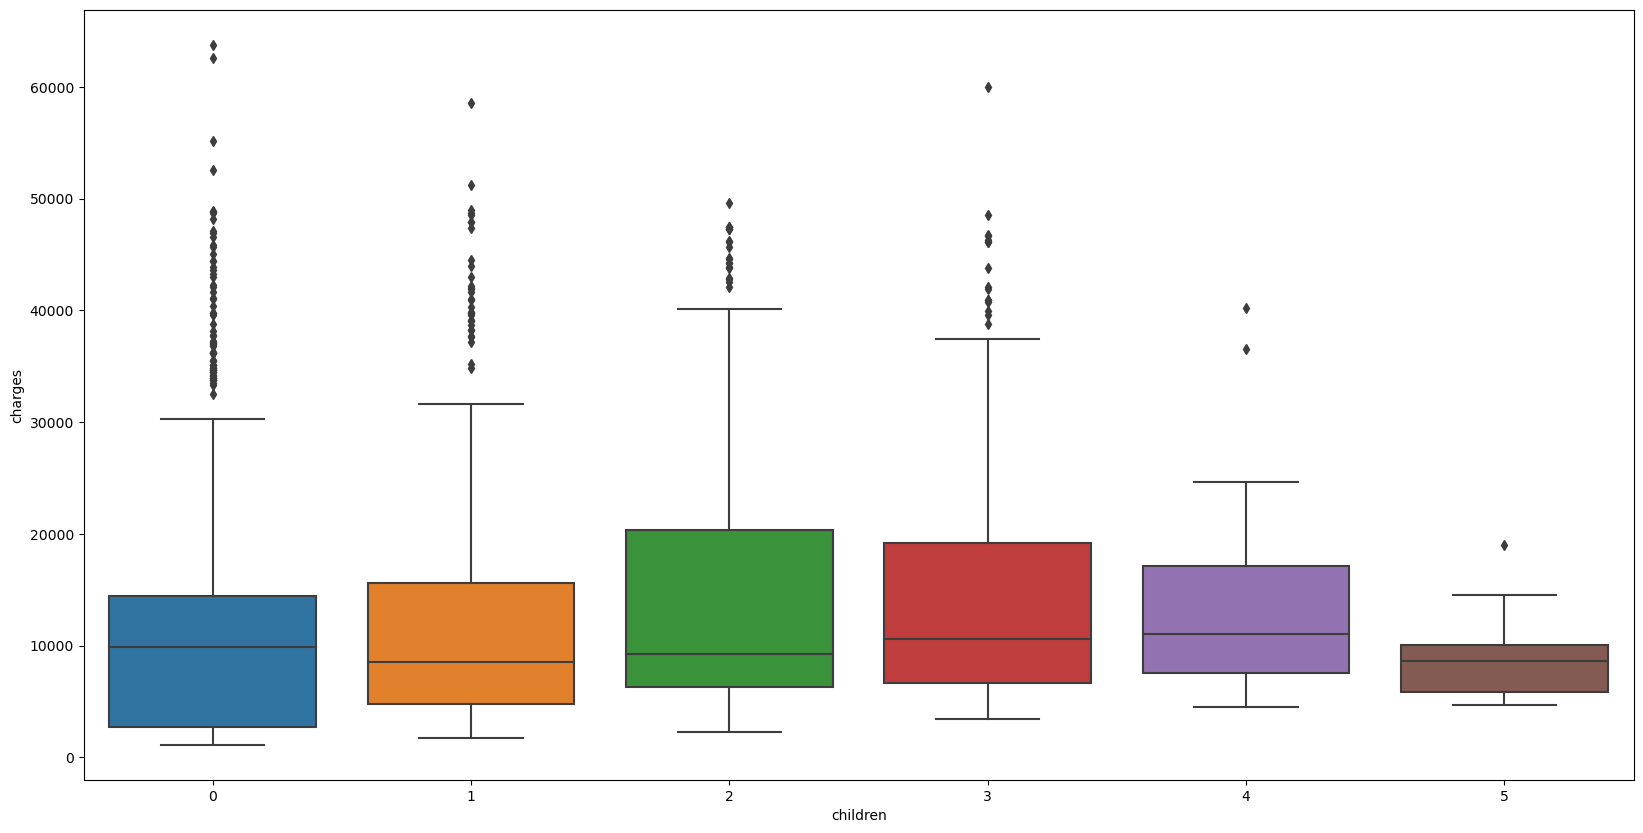

In [31]:
for val in num_var:
    if val != 'charges' and val != 'bmi':
        plt.figure(figsize = (20, 10))
        sns.boxplot(x = df[val], y = df['charges'])
        plt.xlabel(val)
        plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

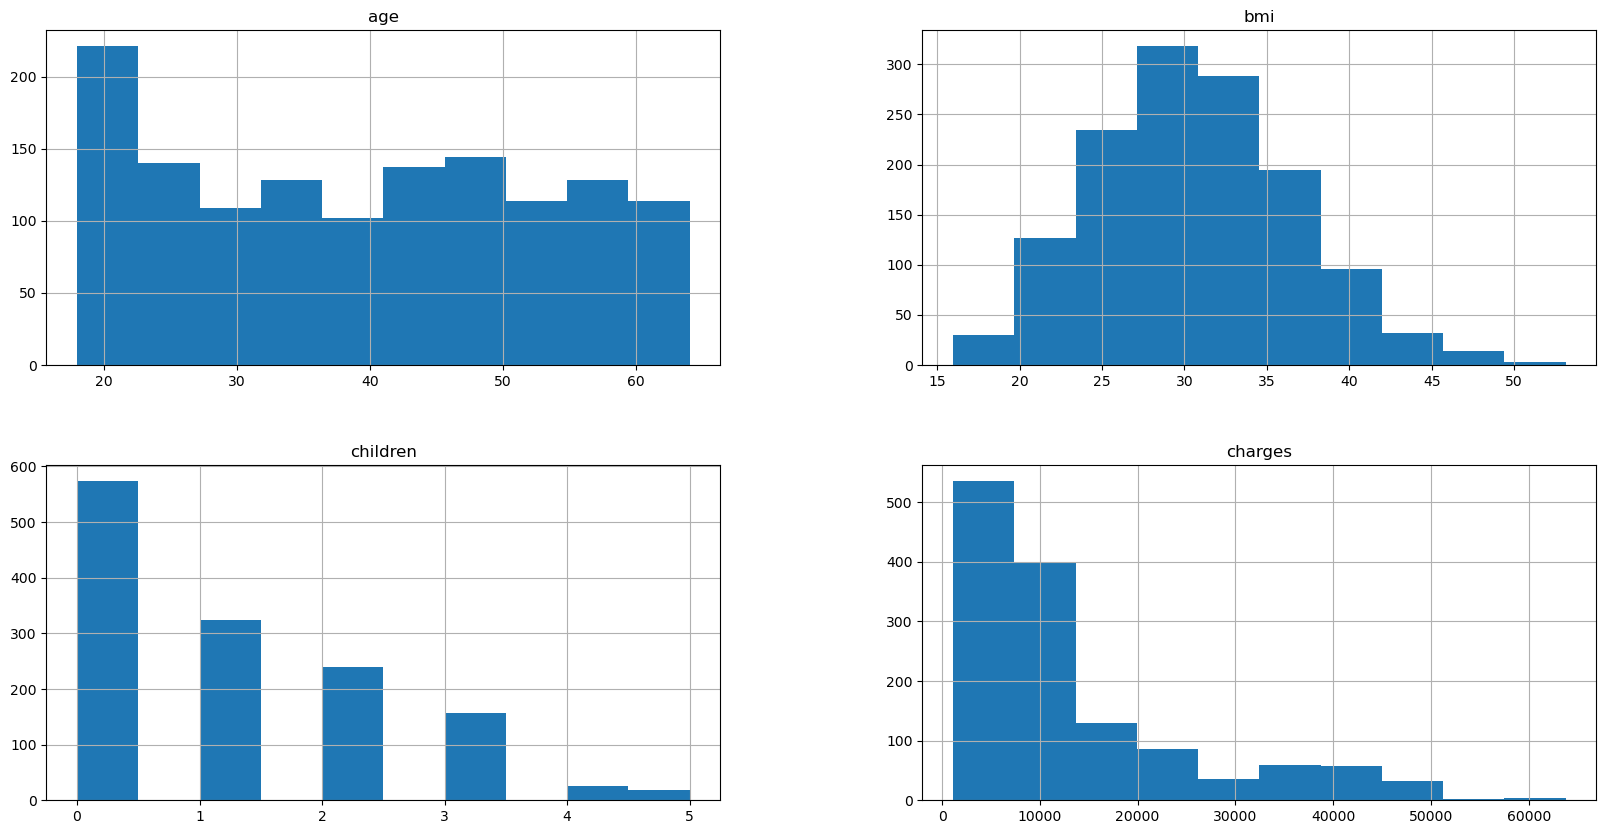

In [32]:
df.hist(figsize = (20, 10))

In [33]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

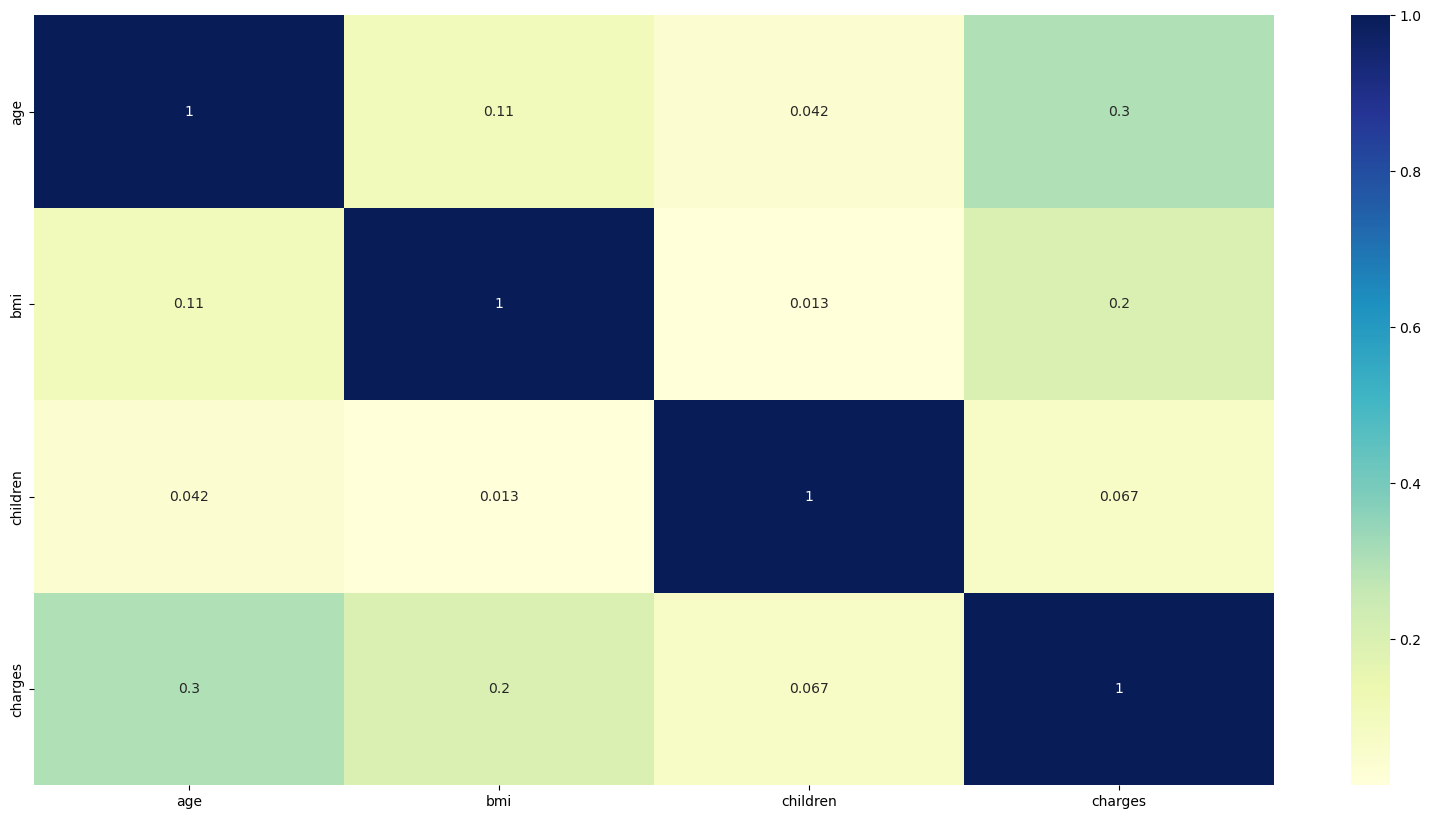

In [34]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')

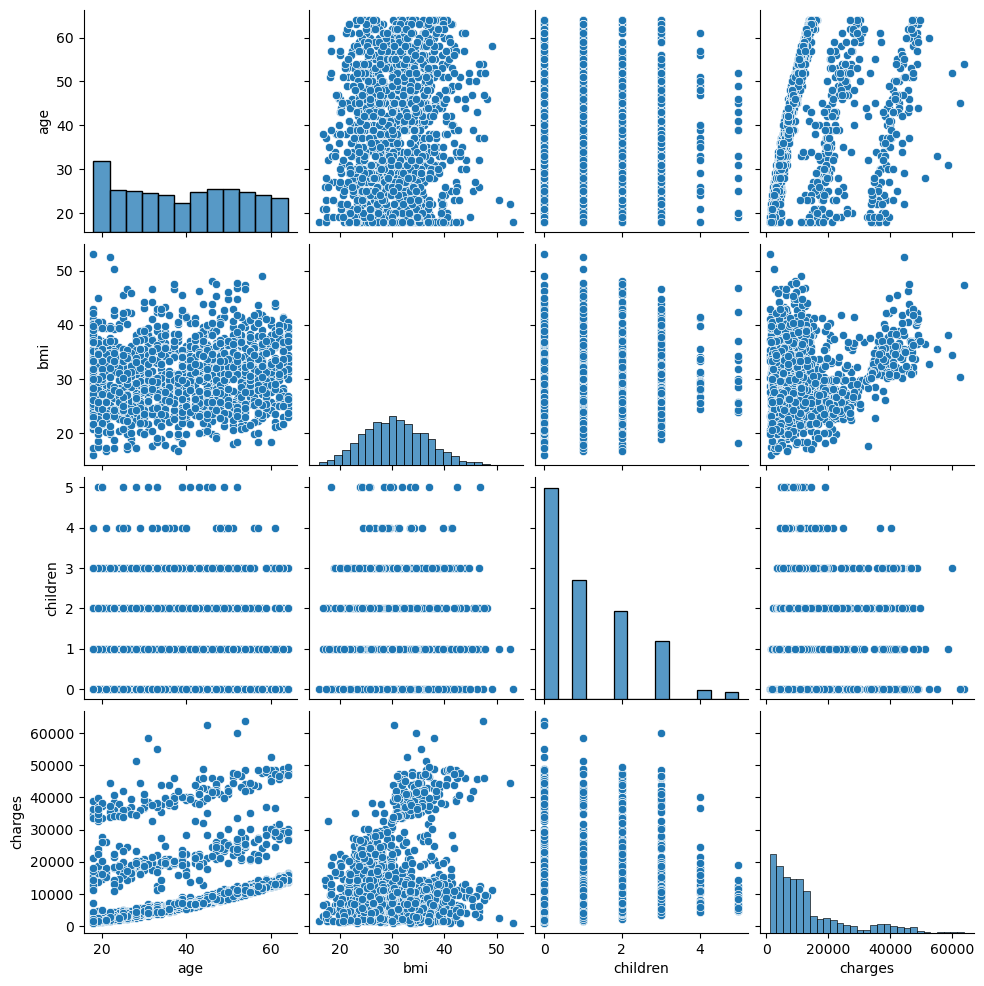

In [35]:
sns.pairplot(df)

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [38]:
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [39]:
df['smoker'] = df['smoker'].map({'no': 0,
                         'yes': 1})

In [40]:
df = df.join(pd.get_dummies(df['sex']))

In [41]:
df.drop(columns = ['sex', 'region'], inplace = True)
df.head()

,age,bmi,children,smoker,charges,female,male
0,19,27.900,0,1,16884.92400,1,0
1,18,33.770,1,0,1725.55230,0,1
2,28,33.000,3,0,4449.46200,0,1
3,33,22.705,0,0,21984.47061,0,1
4,32,28.880,0,0,3866.85520,0,1


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [46]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()

random_model.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
random_model.score(x_train, y_train)

0.9763577132089167

In [48]:
y_pred=random_model.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

26779719.055774916
2780.6378486516805
5174.912468416728


In [51]:
from sklearn.metrics import r2_score

In [52]:
score=r2_score(y_test,y_pred)
print(score)

0.8226942909109501


## Hyperparameter Tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

n_estimators = [100, 200, 300, 400, 500]
criterion = ["squared_error", "absolute_error", "friedman_mse", "poisson"]
max_depth = [10, 20, 30, 40, 50]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ["sqrt", "log2"]

random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_features': ['sqrt', 'log2']}


In [54]:
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3000, cv = 5,
                               random_state = 5, error_score= 'raise', n_jobs = -1)
rf_randomcv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_iter=3000, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=5)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [56]:
rf_randomcv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=2,
                      n_estimators=500)

In [57]:
best_random_grid = rf_randomcv.best_estimator_

In [58]:
y_pred = best_random_grid.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

0.8368034890384186
